# Exploración de datos de enfermedad cardiovascular

In [8]:
library(ggplot2)

In [53]:
# Cargamos los datos
data <- read.csv("../Data/cardiovascular_disease.csv",
colClasses = c("integer", "integer", "numeric", "factor", "integer", "numeric", "integer", "integer", "factor", "factor", "factor", "factor", "factor", "factor"))

In [9]:
# Dimensión de los datos
dim(data)

[1] 70000    14

In [8]:
# Algunos ejemplos
head(data)

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,50.39178,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,55.41918,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,51.66301,1,165,64,130,70,3,1,0,0,0,1
4,3,17623,48.28219,2,169,82,150,100,1,1,0,0,1,1
5,4,17474,47.87397,1,156,56,100,60,1,1,0,0,0,0
6,8,21914,60.03836,1,151,67,120,80,2,2,0,0,0,0


In [10]:
# Más ejemplos
tail(data)

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
69995,99992,21074,57.73699,1,165,80,150,80,1,1,0,0,1,1
69996,99993,19240,52.71233,2,168,76,120,80,1,1,1,0,1,0
69997,99995,22601,61.92055,1,158,126,140,90,2,2,0,0,1,1
69998,99996,19066,52.23562,2,183,105,180,90,3,1,0,1,0,1
69999,99998,22431,61.45479,1,163,72,135,80,1,2,0,0,0,1
70000,99999,20540,56.27397,1,170,72,120,80,2,1,0,0,1,0


In [12]:
# Verificamos si tenemos algún dato faltante
any(is.na(data))

[1] FALSE

In [17]:
# Los datos de la variable que queremos predecir se distribuyen equitativamente entre las clases
table(data$cardio)


    0     1 
35021 34979 

In [13]:
# Obtenemos estadísitcas de las variables 
summary(data)

       id           age_days        age_year         gender         height     
 Min.   :    0   Min.   :10798   Min.   :29.58   Min.   :1.00   Min.   : 55.0  
 1st Qu.:25007   1st Qu.:17664   1st Qu.:48.39   1st Qu.:1.00   1st Qu.:159.0  
 Median :50002   Median :19703   Median :53.98   Median :1.00   Median :165.0  
 Mean   :49972   Mean   :19469   Mean   :53.34   Mean   :1.35   Mean   :164.4  
 3rd Qu.:74889   3rd Qu.:21327   3rd Qu.:58.43   3rd Qu.:2.00   3rd Qu.:170.0  
 Max.   :99999   Max.   :23713   Max.   :64.97   Max.   :2.00   Max.   :250.0  
     weight           ap_hi             ap_lo           cholesterol   
 Min.   : 10.00   Min.   : -150.0   Min.   :  -70.00   Min.   :1.000  
 1st Qu.: 65.00   1st Qu.:  120.0   1st Qu.:   80.00   1st Qu.:1.000  
 Median : 72.00   Median :  120.0   Median :   80.00   Median :1.000  
 Mean   : 74.21   Mean   :  128.8   Mean   :   96.63   Mean   :1.367  
 3rd Qu.: 82.00   3rd Qu.:  140.0   3rd Qu.:   90.00   3rd Qu.:2.000  
 Max.   :200.0

In [27]:
# Observamos la desviación estandar
lapply(data, sd)

$id
[1] 28851.3

$age_days
[1] 2467.252

$age_year
[1] 6.759594

$gender
[1] 0.476838

$height
[1] 8.210126

$weight
[1] 14.39576

$ap_hi
[1] 154.0114

$ap_lo
[1] 188.4725

$cholesterol
[1] 0.6802503

$gluc
[1] 0.5722703

$smoke
[1] 0.2834838

$alco
[1] 0.2255677

$active
[1] 0.3971791

$cardio
[1] 0.5000035

In [2]:
# Observamos si existe correlación entre las variables
cor(data,method = "p")
cor(data,method = "s")
# cor(data,method = "k")

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000000,0.003456526,0.003456526,0.003502185,-0.003037818,-0.001829993,3.355599e-03,-0.002529280,0.006106200,0.002466780,-0.0036991623,0.001209946,3.755116e-03,0.003799389
age_days,0.003456526,1.000000000,1.000000000,-0.022810652,-0.081515349,0.053684043,2.076432e-02,0.017647434,0.154423742,0.098702772,-0.0476328098,-0.029722867,-9.927354e-03,0.238159227
age_year,0.003456526,1.000000000,1.000000000,-0.022810652,-0.081515349,0.053684043,2.076432e-02,0.017647434,0.154423742,0.098702772,-0.0476328098,-0.029722867,-9.927354e-03,0.238159227
gender,0.003502185,-0.022810652,-0.022810652,1.000000000,0.499033428,0.155405640,6.005309e-03,0.015253971,-0.035821413,-0.020491035,0.3381351364,0.170966429,5.865669e-03,0.008109492
height,-0.003037818,-0.081515349,-0.081515349,0.499033428,1.000000000,0.290967835,5.487764e-03,0.006150467,-0.050225952,-0.018594670,0.1879893994,0.094418693,-6.569547e-03,-0.010821058
weight,-0.001829993,0.053684043,0.053684043,0.155405640,0.290967835,1.000000000,3.070221e-02,0.043709773,0.141767906,0.106857265,0.0677804655,0.067112841,-1.686675e-02,0.181659562
ap_hi,0.003355599,0.020764319,0.020764319,0.006005309,0.005487764,0.030702209,1.000000e+00,0.016085513,0.023777922,0.011840678,-0.0009220248,0.001408333,-3.300248e-05,0.054475054
ap_lo,-0.002529280,0.017647434,0.017647434,0.015253971,0.006150467,0.043709773,1.608551e-02,1.000000000,0.024019290,0.010805666,0.0051861304,0.010601240,4.780258e-03,0.065718696
cholesterol,0.006106200,0.154423742,0.154423742,-0.035821413,-0.050225952,0.141767906,2.377792e-02,0.024019290,1.000000000,0.451577524,0.0103544151,0.035760386,9.911297e-03,0.221147274
gluc,0.002466780,0.098702772,0.098702772,-0.020491035,-0.018594670,0.106857265,1.184068e-02,0.010805666,0.451577524,1.000000000,-0.0047564831,0.011245771,-6.769518e-03,0.089306887


,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.0000000000,0.002681719,0.002681719,0.003506216,-0.001886498,-0.001291618,0.003257552,-0.0002381779,0.005705914,0.0027894509,-0.0036974923,0.001214166,0.003765515,0.003800488
age_days,0.0026817187,1.000000000,1.000000000,-0.020176419,-0.082292260,0.061558938,0.219086526,0.1566995261,0.140113032,0.0917913699,-0.0474713951,-0.030078361,-0.010422035,0.234429027
age_year,0.0026817187,1.000000000,1.000000000,-0.020176419,-0.082292260,0.061558938,0.219086526,0.1566995261,0.140113032,0.0917913699,-0.0474713951,-0.030078361,-0.010422035,0.234429027
gender,0.0035062158,-0.020176419,-0.020176419,1.000000000,0.533804513,0.172479948,0.063173535,0.0663740711,-0.035729814,-0.0188664231,0.3381351364,0.170966429,0.005865669,0.008109492
height,-0.0018864981,-0.082292260,-0.082292260,0.533804513,1.000000000,0.313569270,0.019381266,0.0305338058,-0.058940408,-0.0243690581,0.1976324089,0.096669796,-0.007366917,-0.012383341
weight,-0.0012916183,0.061558938,0.061558938,0.172479948,0.313569270,1.000000000,0.277748856,0.2544197871,0.137907934,0.1099010955,0.0716756168,0.068087795,-0.014894465,0.182701088
ap_hi,0.0032575520,0.219086526,0.219086526,0.063173535,0.019381266,0.277748856,1.000000000,0.7354361051,0.208721577,0.1053342311,0.0289286067,0.033242844,-0.001267830,0.451884540
ap_lo,-0.0002381779,0.156699526,0.156699526,0.066374071,0.030533806,0.254419787,0.735436105,1.0000000000,0.167400998,0.0824736244,0.0261716663,0.038862049,0.003401494,0.362572443
cholesterol,0.0057059139,0.140113032,0.140113032,-0.035729814,-0.058940408,0.137907934,0.208721577,0.1674009979,1.000000000,0.4078033426,0.0152196169,0.041285433,0.007573173,0.215117199
gluc,0.0027894509,0.091791370,0.091791370,-0.018866423,-0.024369058,0.109901095,0.105334231,0.0824736244,0.407803343,1.0000000000,0.0004679663,0.018584375,-0.008609967,0.091487571


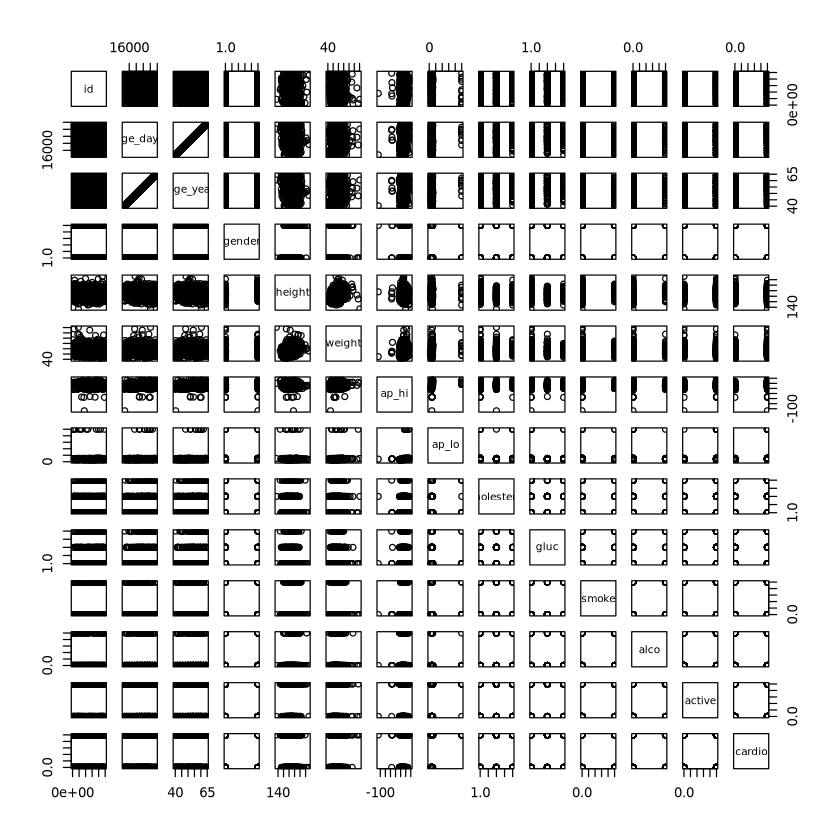

In [4]:
# Hacemos un meustreo para poder visualizar
sampled_rows = sample(row.names(data), size = 1000, replace = F)
par(bg="white")
pairs(data[sampled_rows, ])

La única correlación evidente se da entre *age_days* y *age_years*. Al ser columnas redundantes, podríamos quedarnos con solo una de ellas.

Por otro lado, la variable id es únicamente una etiqueta para identificar cada registro, por lo que debe ser omitida para no inducir información ruidosa.

Ahora compararemos las distribuciones de los datos de acurdo a su clase para la variable *cardio*

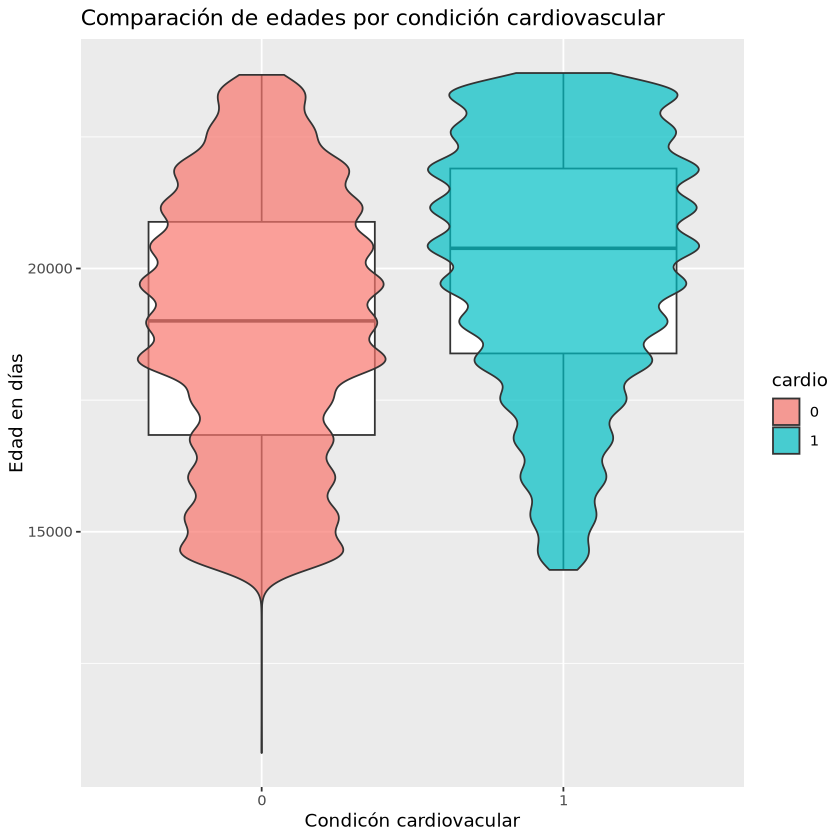

In [80]:
ggplot(data, aes(x=cardio, y=age_days, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.7) +
 labs(title = "Comparación de edades por condición cardiovascular", x = "Condicón cardiovacular", y="Edad en días")

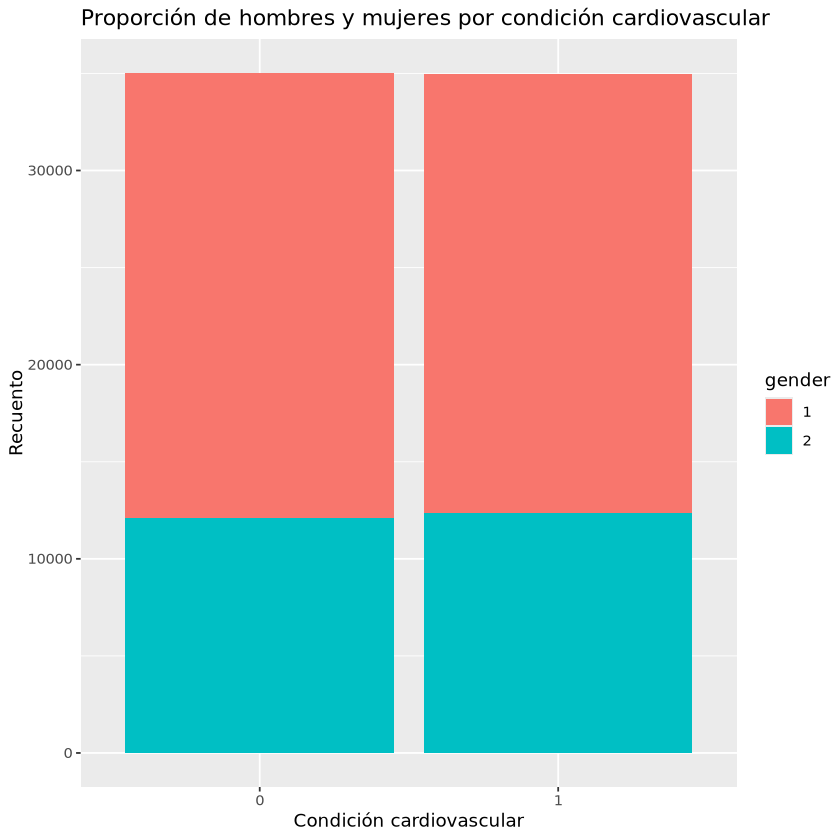

In [78]:
ggplot(data, aes(x=cardio, fill=gender)) +
 geom_bar() +
 labs(title = "Proporción de hombres y mujeres por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")

In [113]:
# Añadimos IMC para resumir la información del peso y la altura
data$IMC <- data$weight / ((data$height / 100)**2) 

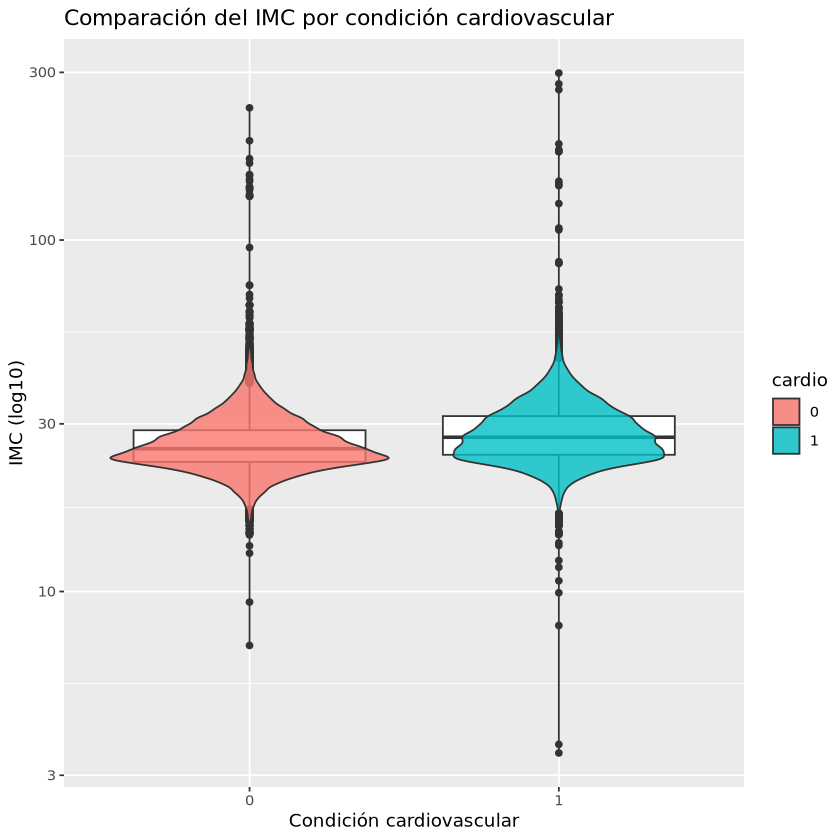

In [114]:
ggplot(data, aes(x=cardio, y=IMC, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 scale_y_continuous(trans='log10') +
 labs(title = "Comparación del IMC por condición cardiovascular", x = "Condición cardiovascular", y = "IMC (log10)")

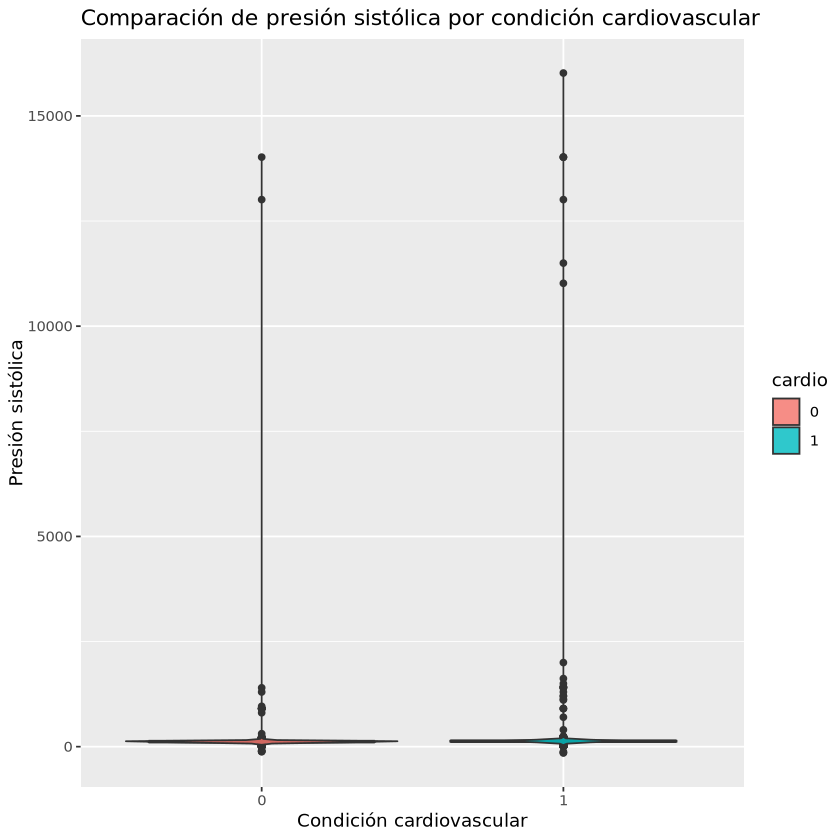

In [86]:
ggplot(data, aes(x=cardio, y=ap_hi, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Comparación de presión sistólica por condición cardiovascular", x = "Condición cardiovascular", y = "Presión sistólica")

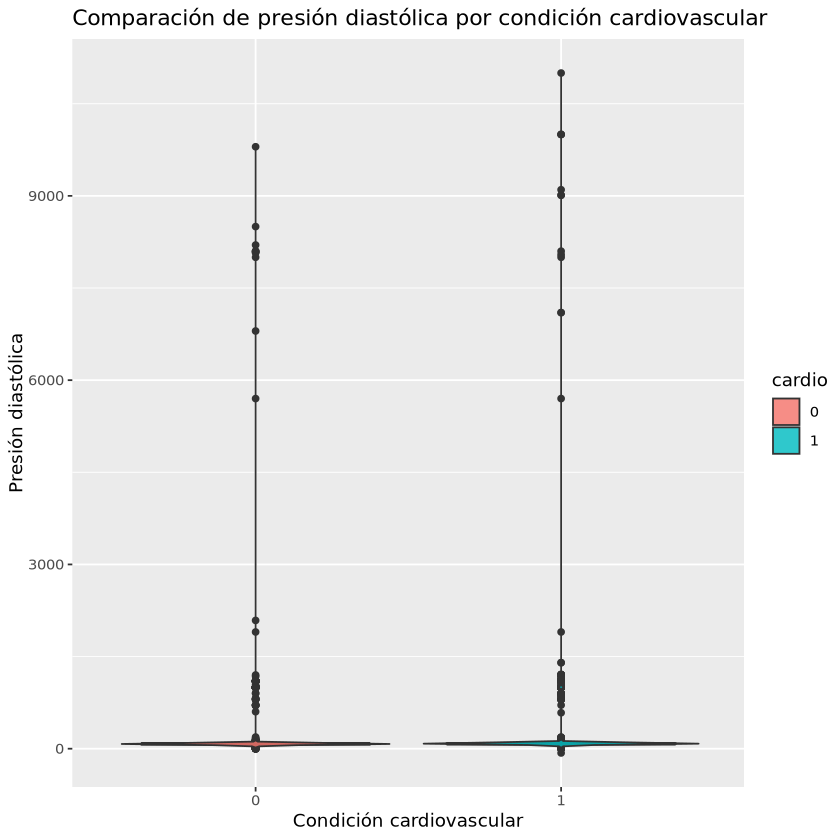

In [88]:
ggplot(data, aes(x=cardio, y=ap_lo, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Comparación de presión diastólica por condición cardiovascular", x = "Condición cardiovascular", y = "Presión diastólica")

In [ ]:
# La presión del pulso relaciona ambas presiones, y se define como la diferencia entre la presión 
# sistólica y la presión disatólca
data$Pp <- data$ap_hi - data$ap_lo

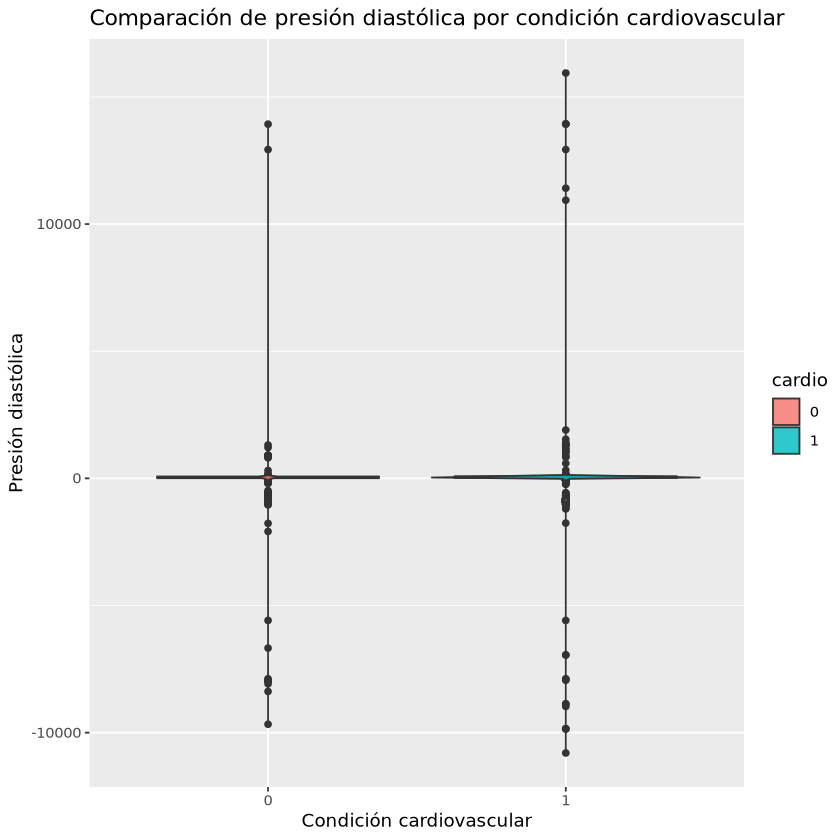

In [111]:
# Se supone que la presión sistólica siempre es mayor que la presión diastólica, 
# por lo que no debería haber valores negatrivos
ggplot(data, aes(x=cardio, y=Pp, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Comparación de presión diastólica por condición cardiovascular", x = "Condición cardiovascular", y = "Presión diastólica")

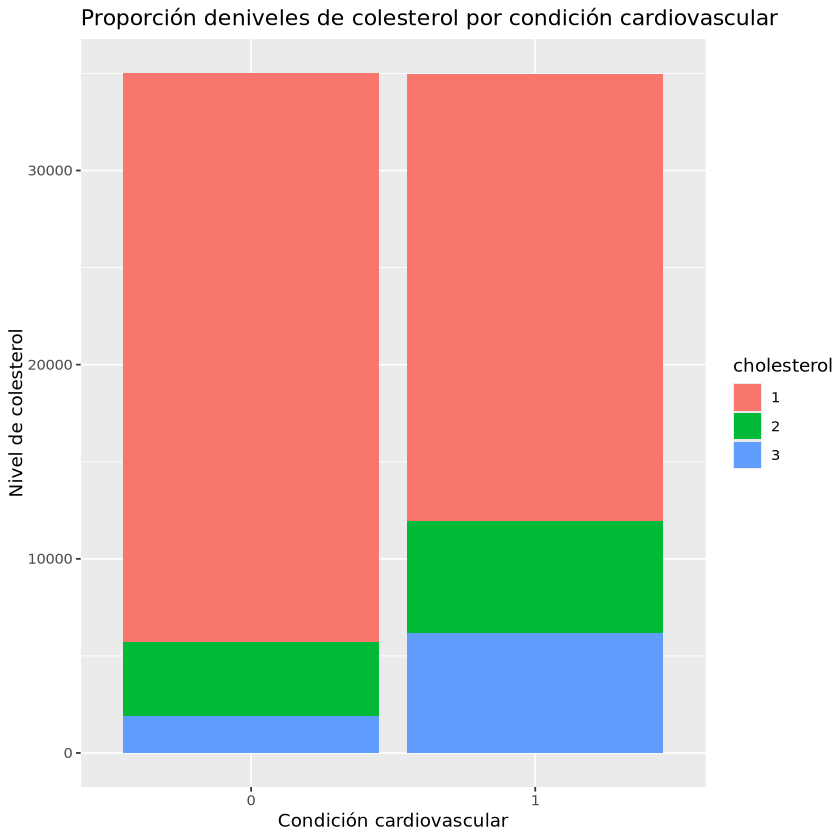

In [93]:
ggplot(data, aes(x=cardio, fill=cholesterol)) +
 geom_bar() +
 labs(title = "Proporción deniveles de colesterol por condición cardiovascular", x = "Condición cardiovascular", y = "Nivel de colesterol")

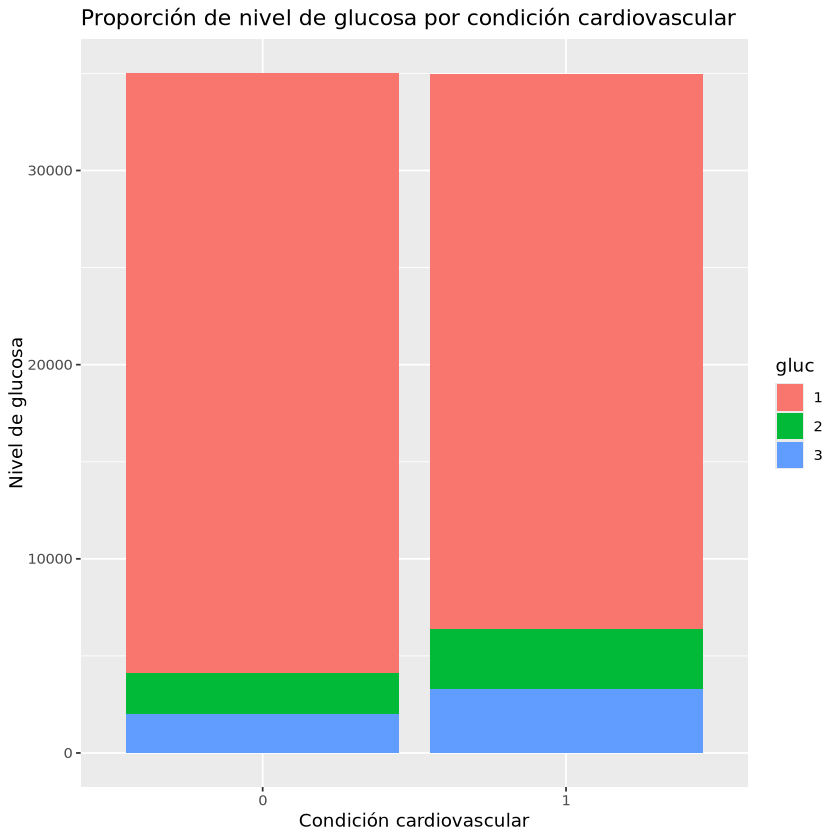

In [94]:
ggplot(data, aes(x=cardio, fill=gluc)) +
 geom_bar() +
 labs(title = "Proporción de nivel de glucosa por condición cardiovascular", x = "Condición cardiovascular", y = "Nivel de glucosa")

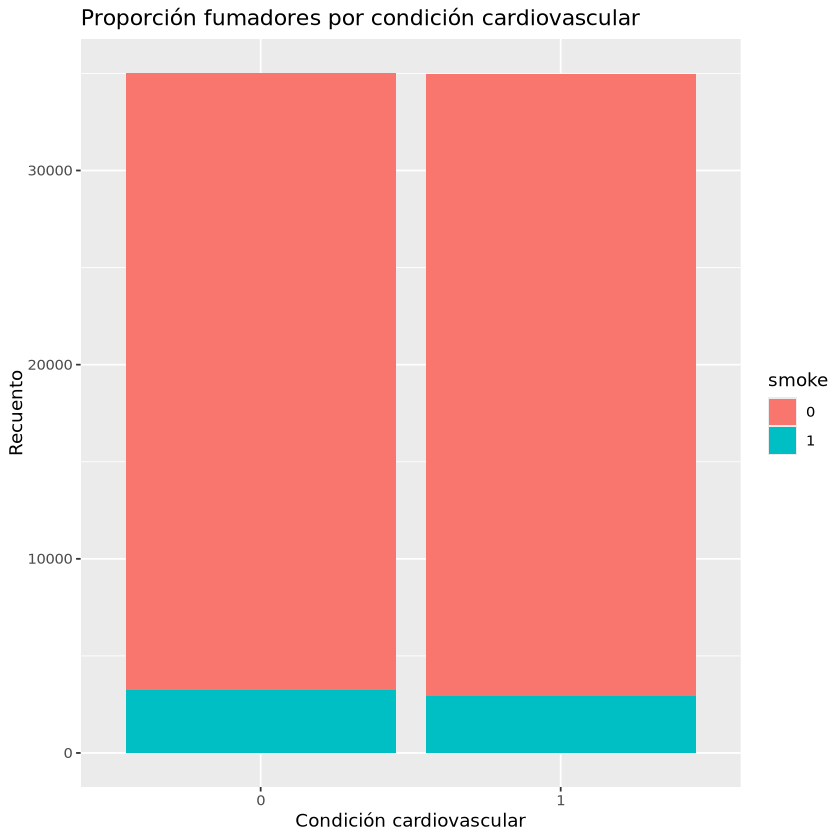

In [95]:
ggplot(data, aes(x=cardio, fill=smoke)) +
 geom_bar() +
 labs(title = "Proporción fumadores por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")

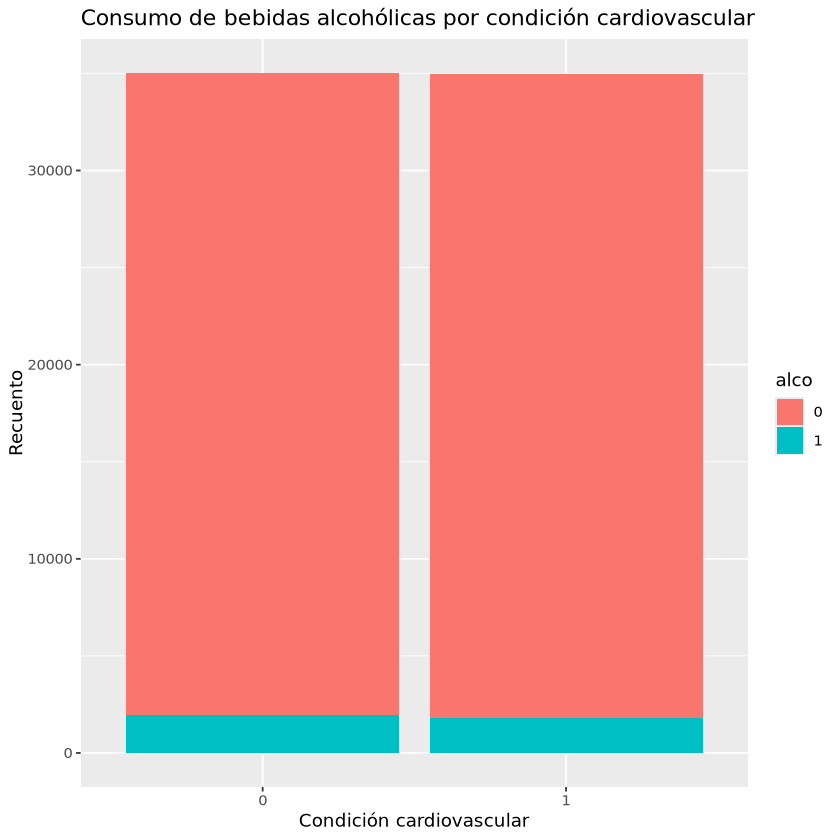

In [98]:
ggplot(data, aes(x=cardio, fill=alco)) +
 geom_bar() +
 labs(title = "Consumo de bebidas alcohólicas por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")


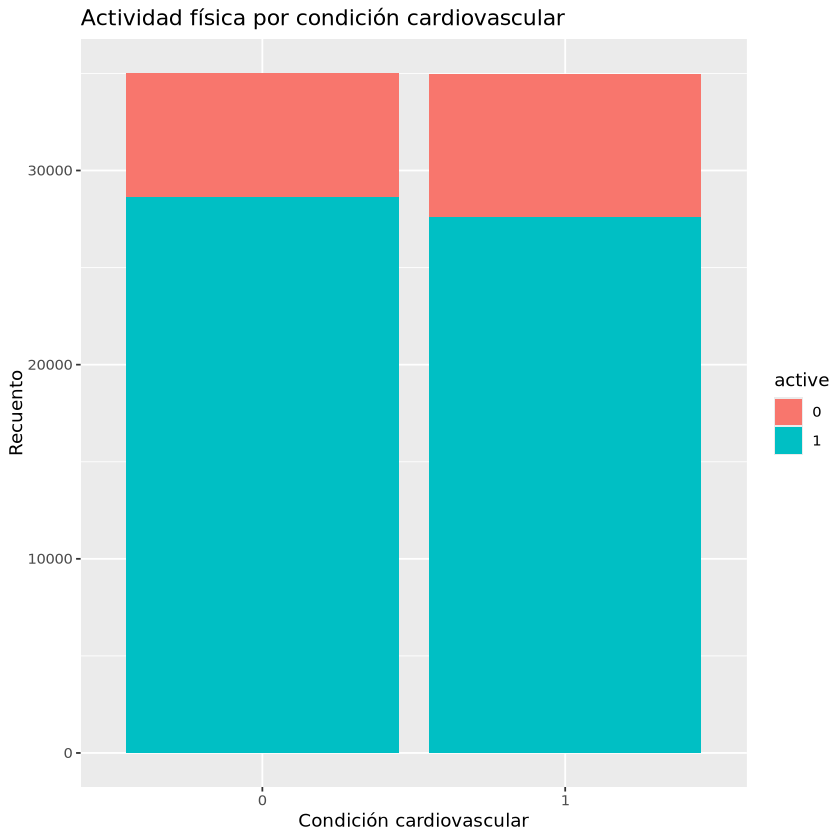

In [99]:
ggplot(data, aes(x=cardio, fill=active)) +
 geom_bar() +
 labs(title = "Actividad física por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")

De los gráficos con el IMC y la presión arterial vemos que hay mucho valores atípicos. Examinemos más de cerca.

In [101]:
summary(data[, c("height", "weight", "ap_hi", "ap_lo")])

     height          weight           ap_hi             ap_lo         
 Min.   : 55.0   Min.   : 10.00   Min.   : -150.0   Min.   :  -70.00  
 1st Qu.:159.0   1st Qu.: 65.00   1st Qu.:  120.0   1st Qu.:   80.00  
 Median :165.0   Median : 72.00   Median :  120.0   Median :   80.00  
 Mean   :164.4   Mean   : 74.21   Mean   :  128.8   Mean   :   96.63  
 3rd Qu.:170.0   3rd Qu.: 82.00   3rd Qu.:  140.0   3rd Qu.:   90.00  
 Max.   :250.0   Max.   :200.00   Max.   :16020.0   Max.   :11000.00  

Las anomalías más claras se encuentran en las presiones. Estas presiones deben ser números positivos que normalmente se encuentran entre 120 (presión sistólica) y 80 (presión diastólica). A su vez, la presión sistólica debería ser mayor que la presión diastólica.

A su vez, el IMC normalmente se encuentra entre 18 y 30. No obstante, tenemos valores muy extremos

In [121]:
summary(data$IMC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.472  23.875  26.374  27.557  30.222 298.667 

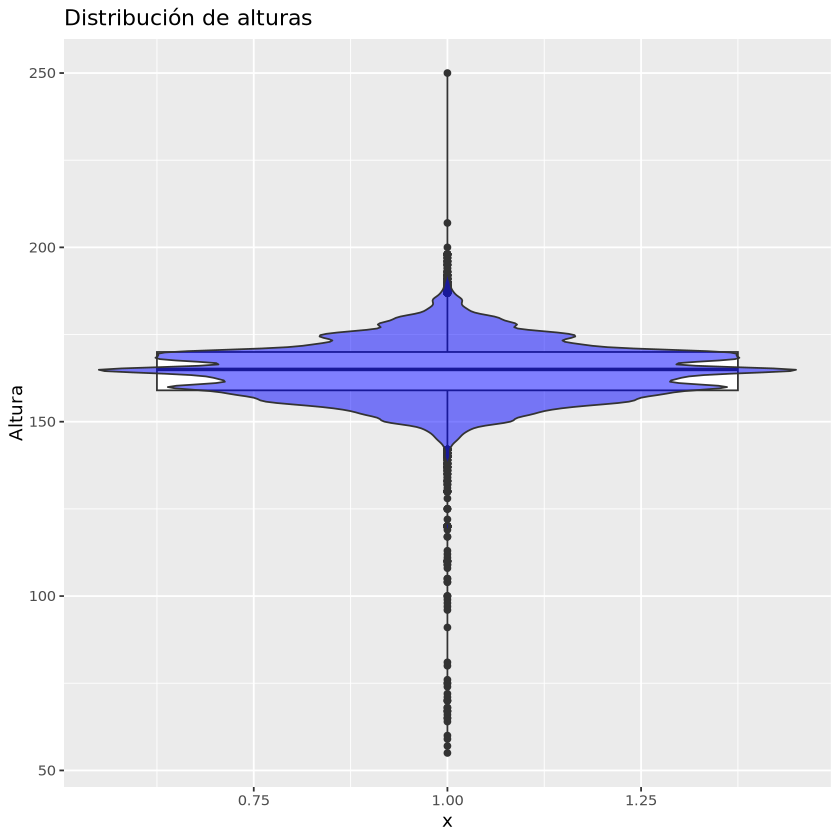

In [128]:
ggplot(data, aes(x = 1, y=height)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.5, fill="blue") +
 labs(title = "Distribución de alturas", y = "Altura")

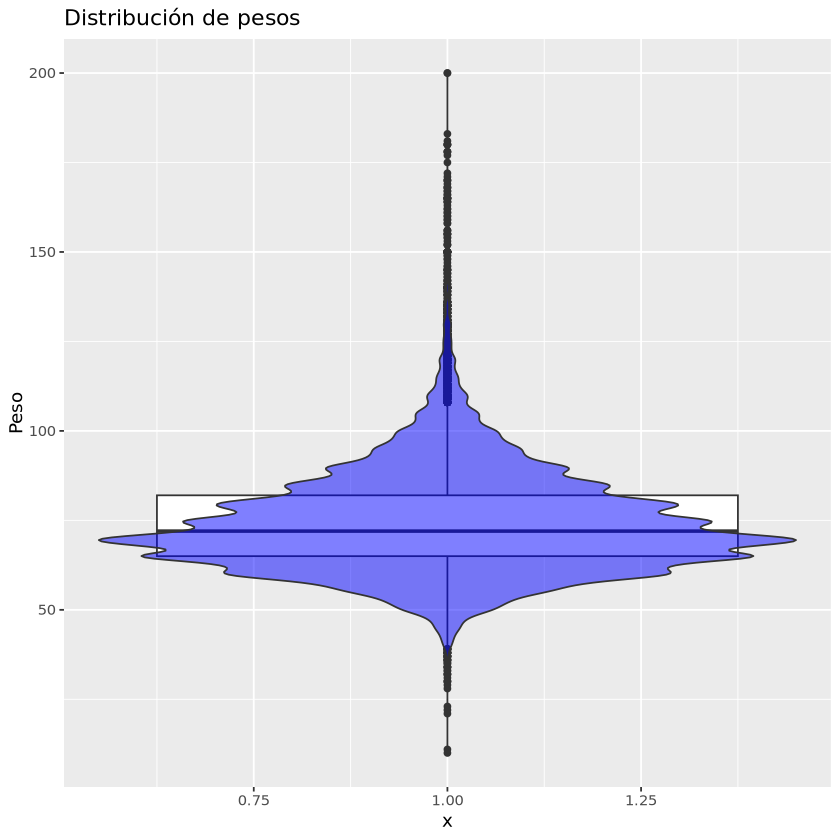

In [129]:
ggplot(data, aes(x = 1, y=weight)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.5, fill="blue") +
 labs(title = "Distribución de pesos", y = "Peso")